In [174]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import time

In [10]:
train1 = pd.read_csv('trainInput1.csv',header=None)
train2 = pd.read_csv('trainInput2.csv',header=None)
train3 = pd.read_csv('trainInput3.csv',header=None)
train4 = pd.read_csv('trainInput4.csv',header=None)
train5 = pd.read_csv('trainInput5.csv',header=None)
train6 = pd.read_csv('trainInput6.csv',header=None)
train7 = pd.read_csv('trainInput7.csv',header=None)
train8 = pd.read_csv('trainInput8.csv',header=None)
train9 = pd.read_csv('trainInput9.csv',header=None)
train10 = pd.read_csv('trainInput10.csv',header=None)
target1 = pd.read_csv('trainTarget1.csv',header=None)
target2 = pd.read_csv('trainTarget2.csv',header=None)
target3 = pd.read_csv('trainTarget3.csv',header=None)
target4 = pd.read_csv('trainTarget4.csv',header=None)
target5 = pd.read_csv('trainTarget5.csv',header=None)
target6 = pd.read_csv('trainTarget6.csv',header=None)
target7 = pd.read_csv('trainTarget7.csv',header=None)
target8 = pd.read_csv('trainTarget8.csv',header=None)
target9 = pd.read_csv('trainTarget9.csv',header=None)
target10 = pd.read_csv('trainTarget10.csv',header=None)

In [12]:
train=[train1,train2,train3,train4,train5,train6,train7,train8,train9,train10]
target=[target1,target2,target3,target4,target5,target6,target7,target8,target9,target10]

In [50]:
def transformation(data,df):
    poly=PolynomialFeatures(df)
    re = poly.fit_transform(data)
    result = np.insert(re,1,0,axis=1)
    return result

In [26]:
def cal_beta(x,y,lambda_parameter):
    A=np.mat(np.transpose(x))*np.mat(x)+lambda_parameter*np.identity(x.shape[1])
    beta=np.mat(np.linalg.inv(A))*np.mat(np.transpose(x))*np.mat(y)
    return beta

In [160]:
def error_one(df,lambda_parameter):
    error = 0
    e=[]
    for i in range(10):
        err=0
        valset = np.array(train[i])
        target_val = np.array(target[i])
        
        valset=transformation(valset,df)
        
        trainset=train[:i]+train[i+1:]
        targets_train=target[:i]+target[i+1:]
        
        x=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        y=np.concatenate((targets_train[0],targets_train[1],targets_train[2],targets_train[3],targets_train[4],targets_train[5],targets_train[6],targets_train[7],targets_train[8]),axis=0)

        x=transformation(x,df)
    
        beta=cal_beta(x,y,lambda_parameter)
        predict=valset*beta
        
        err = (np.mat(np.transpose(predict-target_val))*(np.mat(predict-target_val)))/len(predict)
        error += err
        e.append(err)
    
    avg=error/10
    return (avg,beta)

In [181]:
def error():
    y=[]
    error_vec=[]
    beta_vec = []
    ti=[]
    for i in range(1,5,1):
        start=time.time()
        y=error_one(i,0.5)
        end=time.time()
        du=end-start
        ti.append(du)
        error_vec.append(y[0].item(0))
        beta_vec.append(y[1])
       
    return (error_vec,beta_vec,ti)

In [182]:
result=error()

In [163]:
result[0]

[1.2896315184513716,
 0.902934218546064,
 0.06529020070857958,
 0.053501925973174214]

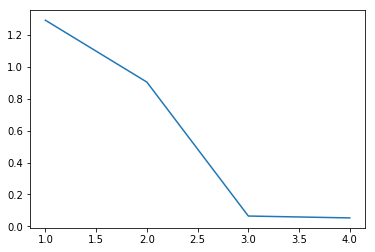

In [164]:
x=np.arange(1, 5, 1)
plt.plot(x,result[0])

In [165]:
a=result[1][3]
b=[]
for i in range(len(a)):
    b.append(a[i].tolist())

In [166]:
beta_hat=np.array(b)
beta_hat=beta_hat.flatten()
beta_hat=np.transpose(beta_hat)

In [167]:
a=np.mat(beta_hat).reshape((16,1))

In [168]:
a.shape

(16, 1)

In [185]:
test = pd.read_csv('testInput.csv',header=None)
test_target = pd.read_csv('testTarget.csv',header=None)

In [186]:
test=transformation(test,4)
predict=np.mat(test)*np.mat(a)
err = np.mat(np.transpose(predict-test_target ))*(np.mat(predict-test_target))/len(predict)

In [187]:
err

matrix([[0.04560348]])

In [183]:
result[2]

[0.016334056854248047,
 0.014032125473022461,
 0.017024993896484375,
 0.018577098846435547]